In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\14 Decision Tree\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
df.skew(numeric_only=True)

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [8]:
df.kurt(numeric_only=True)

Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

In [9]:
#df1=df.copy()

In [10]:
#sns.pairplot(df1)

In [11]:
corr=df.corr(numeric_only=True)
corr

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

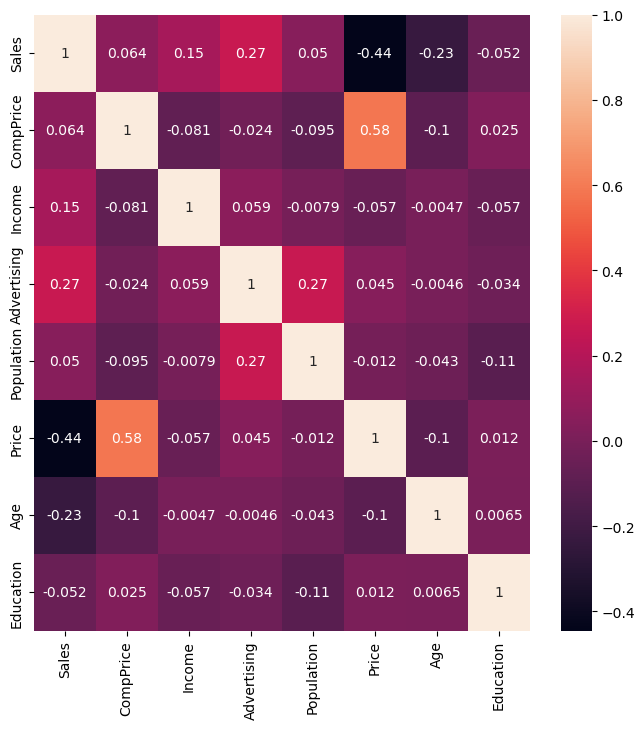

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [13]:
sales_val = []
for value in df["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
df["sales_val"]=sales_val

In [14]:
df.drop('Sales', axis =1, inplace = True)

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


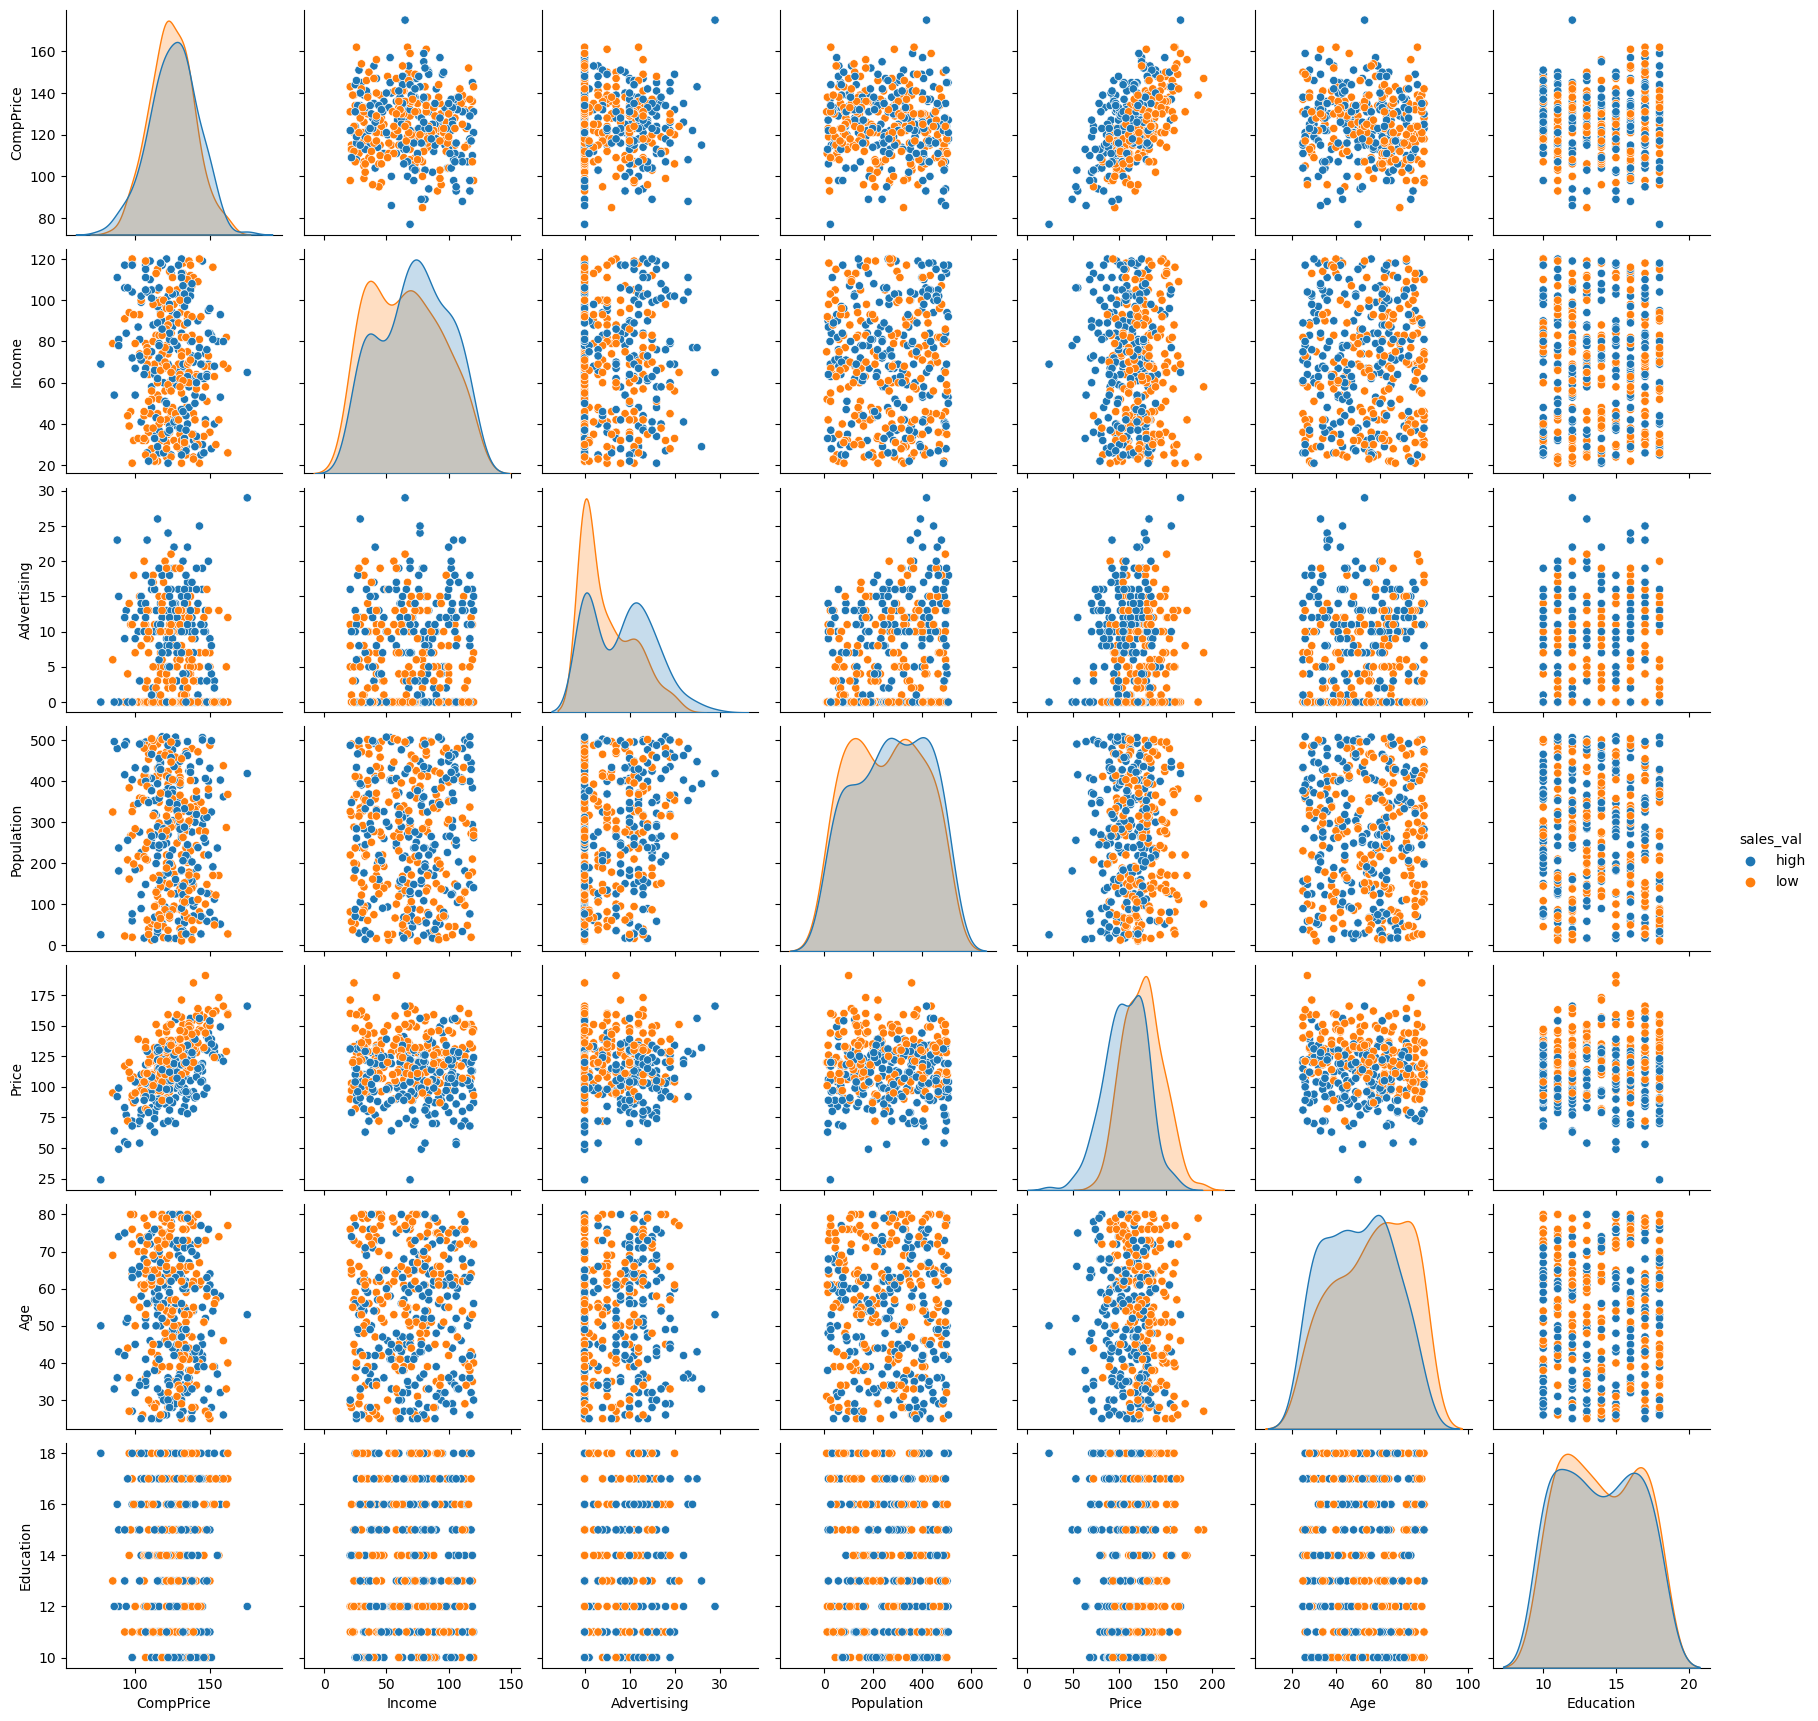

In [15]:
sns.pairplot(data = df, hue = 'sales_val')
plt.show()

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['US'] = le.fit_transform(df['US'])
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['sales_val'] = le.fit_transform(df['sales_val'])

In [17]:
df.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [18]:
df.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_val'],
      dtype='object')

In [19]:
pd.DataFrame({"Columns":df.columns})

,Columns
0,CompPrice
1,Income
2,Advertising
3,Population
4,Price
5,ShelveLoc
6,Age
7,Education
8,Urban
9,US


In [20]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [25]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.32, 0.9166666666666666, 'x[4] <= 88.5\nentropy = 1.0\nsamples = 320\nvalue = [156, 164]'),
 Text(0.12, 0.75, 'x[1] <= 46.0\nentropy = 0.196\nsamples = 33\nvalue = [32, 1]'),
 Text(0.08, 0.5833333333333334, 'x[5] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.04, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.12, 0.4166666666666667, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.16, 0.5833333333333334, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.52, 0.75, 'x[4] <= 131.5\nentropy = 0.987\nsamples = 287\nvalue = [124, 163]'),
 Text(0.3, 0.5833333333333334, 'x[6] <= 63.5\nentropy = 0.998\nsamples = 207\nvalue = [109, 98]'),
 Text(0.2, 0.4166666666666667, 'x[2] <= 8.5\nentropy = 0.93\nsamples = 142\nvalue = [93, 49]'),
 Text(0.12, 0.25, 'x[5] <= 0.5\nentropy = 1.0\nsamples = 85\nvalue = [43, 42]'),
 Text(0.08, 0.08333333333333333, 'entropy = 0.795\nsamples = 25\nvalue = [6, 19]'),
 Text(0.16, 0.08333333333333333, 'ent

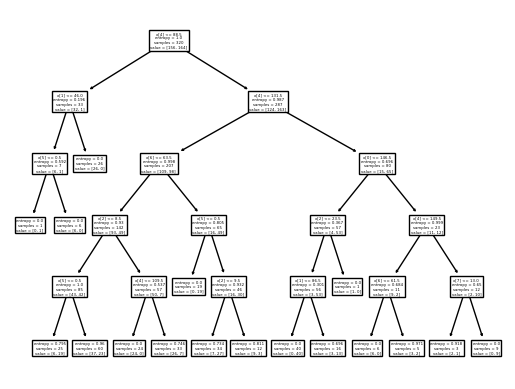

In [27]:
from sklearn import tree
tree.plot_tree(dtc)

In [28]:
y_train.value_counts().keys()

Index([1, 0], dtype='int32', name='sales_val')

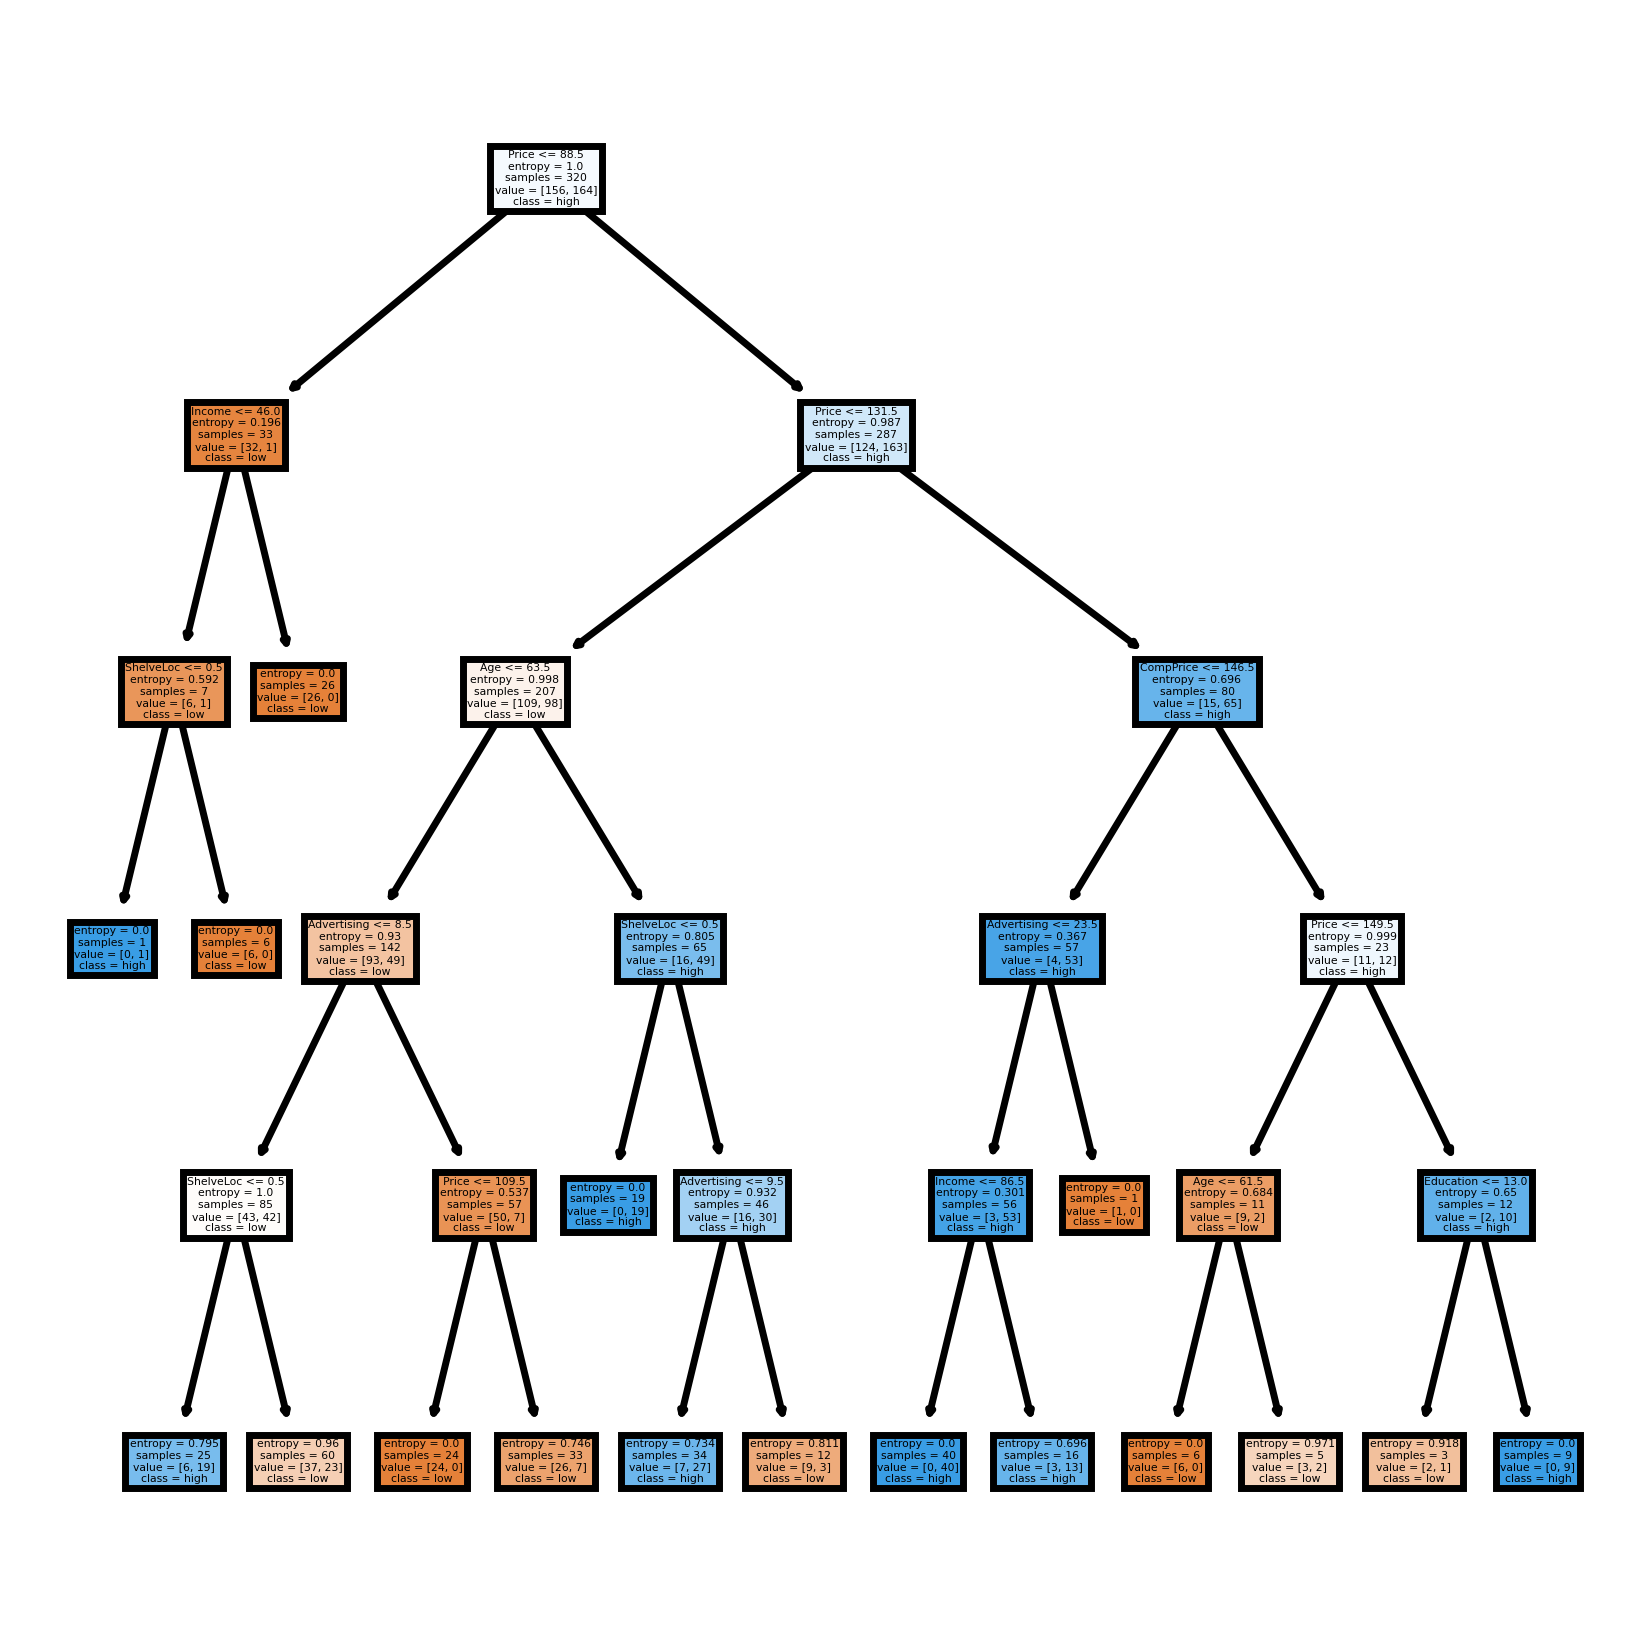

In [29]:
col = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']   # Columns
cn = ['low', 'high']   # value_counts.keys
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(dtc, feature_names = col, class_names = cn, filled = True)
plt.show()

In [30]:
pred_train=dtc.predict(x_train)

In [31]:
pred_test=dtc.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
accuracy_score(y_train,pred_train)

0.8375

In [34]:
accuracy_score(y_test,pred_test)

0.725

In [35]:
confusion_matrix(y_test,pred_test)

array([[36,  7],
       [15, 22]], dtype=int64)